# Modelling Greenspace Metrics

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#! pip install pygam

## 1. Modelling greenspace metrics at 100m

In [3]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_100_df.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,Grass%_100,Shrubs%_100,geometry
0,0.641659,0.780488,0.787667,0.158730,0.129252,POINT (400173.361 405813.506)
1,0.675657,0.665080,0.210689,0.038549,0.482993,POINT (372621.724 413362.205)
2,0.871239,1.000000,0.426927,0.489796,0.192744,POINT (383564.442 390537.080)
3,0.805049,0.916716,0.253443,0.056689,0.696145,POINT (390233.154 383013.102)
4,0.472362,0.403331,0.158479,0.156463,0.124717,POINT (391596.504 398918.321)


### 1.1. How does NDVI predict Greenspace%?

#### 1.1.1. Linear Regression Model

In [4]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [5]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [1.41737675]
Intercept: -0.20786933866496082
R-squared: 0.6638217928995317


In [6]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [7]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11303396555166897
Mean Squared Error: 0.024839851768518682
Root Mean Squared Error: 0.15760663618172518


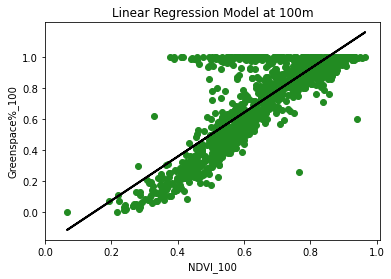

In [8]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
# predict Greenspace%_100 values for NDVI equalt to 0.3
X_t_0 = [[0.3]]
y_t_0 = model_100.predict(X_t_0)
print(model_100.predict(X_t_0))

[0.21734369]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# predict Greenspace%_100 values for NDVI equalt to 0.4
X_t_1 = [[0.4]]
y_t_1 = model_100.predict(X_t_1)
print(model_100.predict(X_t_1))

[0.35908136]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# how does Greenspace%_100 increase if NDVI goes from 0.3 to 0.4?
#print('Greenspace%_100 increase if NDVI goes from 0.3 to 0.4:', y_t_1 - y_t_0)
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', y_t_1 - y_t_0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.14173767]


#### 1.1.2. Generalized Additive Model (GAM)

In [139]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and Y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.2816
Link Function:                     IdentityLink Log Likelihood:                                 -83790.689
Number of Samples:                         4668 AIC:                                           167611.9413
                                                AICc:                                          167612.0483
                                                GCV:                                                0.0241
                                                Scale:                                               0.024
                                                Pseudo R-Squared:                                   0.6908
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/198064715.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [140]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

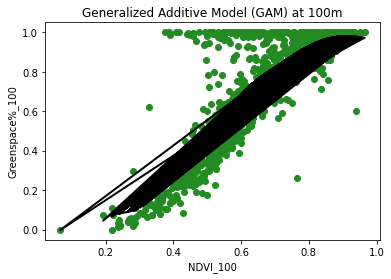

In [141]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [145]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_100.predict(0.25)
green_l1 = gam_100.predict(0.35)
green_sens_low = float(green_l1 - green_l0)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by:', green_sens_low)

If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by: 0.10558179930754596


In [147]:
# Change in mid NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_100.predict(0.45)
green_m1 = gam_100.predict(0.55)
green_sens_mid = float(green_m1 - green_m0)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by:', green_sens_mid)

If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by: 0.1984360621179868


In [148]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_100.predict(0.65)
green_h1 = gam_100.predict(0.75)
green_sens_hig = float(green_h1 - green_h0)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by:', green_sens_hig)

If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by: 0.11628007814870056


### 1.2. How does NDVI predict Canopy%?

#### 1.2.1. Linear Regression Model

In [19]:
# NDVI_100 as the predictor
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Canopy%_100 as the target
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [20]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [-0.00517506]
Intercept: 0.1994239797324285
R-squared: 2.3242251511734757e-05


In [21]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [22]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13522807129125317
Mean Squared Error: 0.031499129800154346
Root Mean Squared Error: 0.1774799419657172


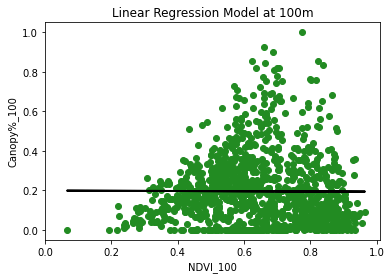

In [23]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Canopy%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.2.2. Generalized Additive Model (GAM)

In [156]:
# data/predictors as the NDVI_100
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Canopy%_100
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and Y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.2816
Link Function:                     IdentityLink Log Likelihood:                                -73046.4405
Number of Samples:                         4668 AIC:                                           146123.4443
                                                AICc:                                          146123.5513
                                                GCV:                                                0.0273
                                                Scale:                                              0.0272
                                                Pseudo R-Squared:                                   0.0805
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/881848350.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [157]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

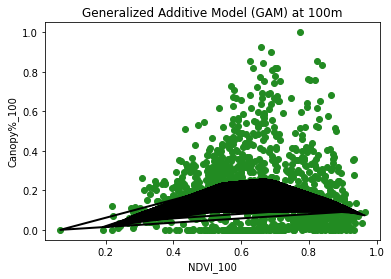

In [158]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Canopy%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [160]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.25 to 0.35?
canopy_l0 = gam_100.predict(0.25)
canopy_l1 = gam_100.predict(0.35)
canopy_sens_low = float(canopy_l1 - canopy_l0)
print('If NDVI goes from 0.25 to 0.35, Canopy%_100 increases by:', canopy_sens_low)

If NDVI goes from 0.25 to 0.35, Canopy%_100 increases by: 0.05925175241204339


In [161]:
# Change in mid NDVI values: how does Canopy% increase, if NDVI changes from 0.45 to 0.55?
canopy_m0 = gam_100.predict(0.45)
canopy_m1 = gam_100.predict(0.55)
canopy_sens_mid = float(canopy_m1 - canopy_m0)
print('If NDVI goes from 0.45 to 0.55, Canopy%_100 increases by:', canopy_sens_mid)

If NDVI goes from 0.45 to 0.55, Canopy%_100 increases by: 0.0720288180607698


In [162]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.65 to 0.75?
canopy_h0 = gam_100.predict(0.65)
canopy_h1 = gam_100.predict(0.75)
canopy_sens_hig = float(canopy_h1 - canopy_h0)
print('If NDVI goes from 0.65 to 0.75, Canopy%_100 increases by:', canopy_sens_hig)

If NDVI goes from 0.65 to 0.75, Canopy%_100 increases by: -0.051608142585441746


### 1.3. How does NDVI predict Grass%?

#### 1.3.1. Linear Regression Model

In [27]:
# NDVI_100 as the predictor
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Grass%_100 as the target
target = pd.DataFrame(gdf_100, columns=['Grass%_100'])

# define X and y
X = df
y = target['Grass%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [28]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [0.43524323]
Intercept: -0.11750680018851642
R-squared: 0.1571136918225765


In [29]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [30]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11148451456320206
Mean Squared Error: 0.02698600149400303
Root Mean Squared Error: 0.164274165631736


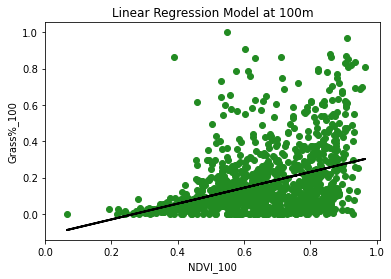

In [31]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Grass%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_grass_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.3.2. Generalized Additive Model (GAM)

In [150]:
# data/predictors as the NDVI_100
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Grass%_100
target = pd.DataFrame(gdf_100, columns=['Grass%_100'])

# define X and Y
X = df
y = target['Grass%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.2816
Link Function:                     IdentityLink Log Likelihood:                                -80755.4988
Number of Samples:                         4668 AIC:                                           161541.5608
                                                AICc:                                          161541.6678
                                                GCV:                                                 0.025
                                                Scale:                                              0.0248
                                                Pseudo R-Squared:                                   0.1975
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/191219612.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [151]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

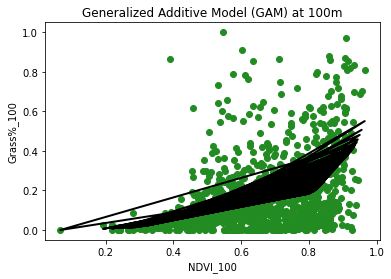

In [152]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Grass%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_grass_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [153]:
# Change in low NDVI values: how does Grass% increase, if NDVI changes from 0.25 to 0.35?
grass_l0 = gam_100.predict(0.25)
grass_l1 = gam_100.predict(0.35)
grass_sens_low = float(grass_l1 - grass_l0)
print('If NDVI goes from 0.25 to 0.35, Grass%_100 increases by:', grass_sens_low)

If NDVI goes from 0.25 to 0.35, Grass%_100 increases by: 0.02237798115215814


In [154]:
# Change in mid NDVI values: how does Grass% increase, if NDVI changes from 0.45 to 0.55?
grass_m0 = gam_100.predict(0.45)
grass_m1 = gam_100.predict(0.55)
grass_sens_mid = float(grass_m1 - grass_m0)
print('If NDVI goes from 0.45 to 0.55, Grass%_100 increases by:', grass_sens_mid)

If NDVI goes from 0.45 to 0.55, Grass%_100 increases by: 0.03839167913941796


In [155]:
# Change in high NDVI values: how does Grass% increase, if NDVI changes from 0.65 to 0.75?
grass_h0 = gam_100.predict(0.65)
grass_h1 = gam_100.predict(0.75)
grass_sens_hig = float(grass_h1 - grass_h0)
print('If NDVI goes from 0.65 to 0.75, Grass%_100 increases by:', grass_sens_hig)

If NDVI goes from 0.65 to 0.75, Grass%_100 increases by: 0.023844990079469025


### 1.4. How does NDVI predict Shrubs%?

#### 1.4.1. Linear Regression Model

In [93]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Shrubs%_100
target_100 = pd.DataFrame(gdf_100, columns=['Shrubs%_100'])

# define X and y
X = df_100
y = target_100['Shrubs%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [94]:

# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [0.69347401]
Intercept: -0.10792750488582803
R-squared: 0.15437465426410546


In [95]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [96]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19142208007866623
Mean Squared Error: 0.062005786548886034
Root Mean Squared Error: 0.24900961135844946


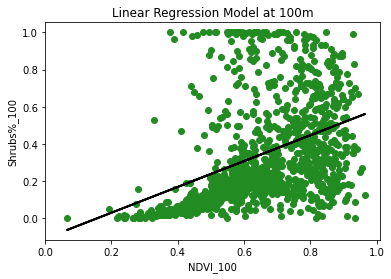

In [97]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Shrubs%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_shrubs_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.4.2. Generalized Additive Model (GAM)

In [163]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Shrubs%_100
target_100 = pd.DataFrame(gdf_100, columns=['Shrubs%_100'])

# define X and Y
X = df_100
y = target_100['Shrubs%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.2816
Link Function:                     IdentityLink Log Likelihood:                                -26814.1147
Number of Samples:                         4668 AIC:                                            53658.7926
                                                AICc:                                           53658.8996
                                                GCV:                                                0.0665
                                                Scale:                                              0.0661
                                                Pseudo R-Squared:                                   0.1732
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/2700002944.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [164]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

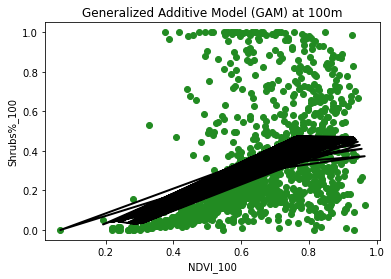

In [165]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Shrubs%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_shrubs_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [166]:
# Change in low NDVI values: how does Shrubs% increase, if NDVI changes from 0.25 to 0.35?
shrubs_l0 = gam_100.predict(0.25)
shrubs_l1 = gam_100.predict(0.35)
shrubs_sens_low = float(shrubs_l1 - shrubs_l0)
print('If NDVI goes from 0.25 to 0.35, Shrubs%_100 increases by:', shrubs_sens_low)

If NDVI goes from 0.25 to 0.35, Shrubs%_100 increases by: 0.03598841281587113


In [167]:
# Change in mid NDVI values: how does Shrubs% increase, if NDVI changes from 0.45 to 0.55?
shrubs_m0 = gam_100.predict(0.45)
shrubs_m1 = gam_100.predict(0.55)
shrubs_sens_mid = float(shrubs_m1 - shrubs_m0)
print('If NDVI goes from 0.45 to 0.55, Shrubs%_100 increases by:', shrubs_sens_mid)

If NDVI goes from 0.45 to 0.55, Shrubs%_100 increases by: 0.10116356687125766


In [168]:
# Change in high NDVI values: how does Shrubs% increase, if NDVI changes from 0.65 to 0.75?
shrubs_h0 = gam_100.predict(0.65)
shrubs_h1 = gam_100.predict(0.75)
shrubs_sens_hig = float(shrubs_h1 - shrubs_h0)
print('If NDVI goes from 0.65 to 0.75, Shrubs%_100 increases by:', shrubs_sens_hig)

If NDVI goes from 0.65 to 0.75, Shrubs%_100 increases by: 0.08318956871732286


### 1.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [54]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
df = pd.DataFrame(gdf_100, columns=cols)

# target as NDVI_100
target = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# define X and Y
X = df
y = target['NDVI_100']
#X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model
gam_100 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)
#gam_100 = LinearGAM(n_splines=10).gridsearch(X, y)
#gam_100 = LinearGAM(s(0) + s(1) + s(2))
#gam_100.gridsearch(X, y)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.8539
Link Function:                     IdentityLink Log Likelihood:                               -182983.3579
Number of Samples:                         4668 AIC:                                           366058.4235
                                                AICc:                                          366059.3533
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5514
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/1087768425.py:23: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


<Figure size 432x288 with 0 Axes>

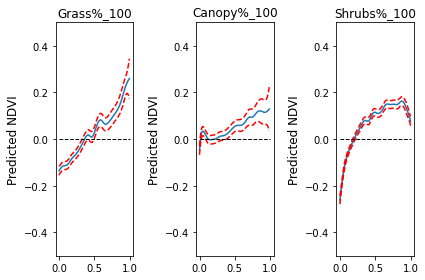

In [89]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
for i, ax in enumerate(axs):
    XX = gam_100.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_100.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_100.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 2. Modelling greenspace metrics at 300m

In [57]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_300_df.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,Grass%_300,Shrubs%_300,geometry
0,0.281673,0.336101,1.897265e-01,0.037879,0.101613,POINT (382286.540 396971.736)
1,0.908959,0.961154,2.296515e-01,0.488981,0.274194,POINT (380292.947 385966.872)
2,0.662655,0.751865,2.449267e-01,0.125344,0.338441,POINT (388038.733 412187.156)
3,0.552645,0.994652,1.982036e-16,0.069215,0.897849,POINT (376338.417 418312.798)
4,0.783100,0.884166,2.393294e-01,0.173898,0.659140,POINT (400702.374 407703.870)


### 2.1. How does NDVI predict Greenspace%?

#### 2.1.1. Linear Regression Model

In [36]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and y
X = df
y = target['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [37]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [1.12608828]
Intercept: 0.025260875380742398
R-squared: 0.6735037485013325


In [38]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [39]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09313176412427915
Mean Squared Error: 0.017602399077306513
Root Mean Squared Error: 0.13267403316891557


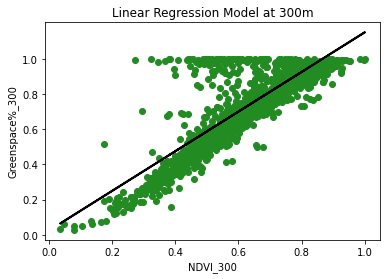

In [40]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [41]:
# Change in NDVI values: how does Greenspace% increase, if NDVI changes from 0.3 to 0.4?
green0 = model_300.predict([[0.3]])
green1 = model_300.predict([[0.4]])
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', green1 - green0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.11260883]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 2.1.2. Generalized Additive Model (GAM)

In [42]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Greenspace%_300
target_300 = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and Y
X = df_300
y = target_300['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.3555
Link Function:                     IdentityLink Log Likelihood:                                -121556.769
Number of Samples:                         4688 AIC:                                            243146.249
                                                AICc:                                          243146.3705
                                                GCV:                                                0.0172
                                                Scale:                                              0.0171
                                                Pseudo R-Squared:                                   0.6975
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/847380652.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [43]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

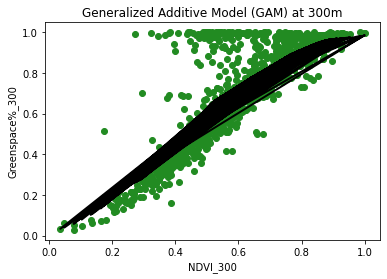

In [44]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [45]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_300.predict(0.25)
green_l1 = gam_300.predict(0.35)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by:', green_l1 - green_l0)

If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by: [0.11849471]


In [46]:
# Change in medium NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_300.predict(0.45)
green_m1 = gam_300.predict(0.55)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by:', green_m1 - green_m0)

If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by: [0.15972124]


In [47]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_300.predict(0.65)
green_h1 = gam_300.predict(0.75)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by:', green_h1 - green_h0)

If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by: [0.09143221]


### 2.2. How does NDVI predict Canopy%?

#### 2.2.1. Linear Regression Model

In [48]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Canopy%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and y
X = df
y = target['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [49]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [-0.08309671]
Intercept: 0.28283368242176493
R-squared: 0.008500217422386491


In [50]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [51]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11585049308665299
Mean Squared Error: 0.022159794217830577
Root Mean Squared Error: 0.14886166134310935


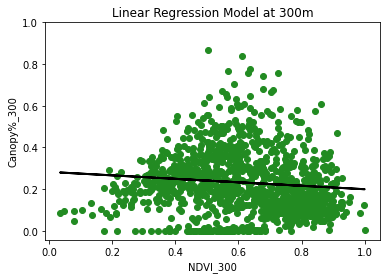

In [52]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Canopy%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.2.2. Generalized Additive Model (GAM)

In [53]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Greenspace%_300
target_300 = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and Y
X = df_300
y = target_300['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.3555
Link Function:                     IdentityLink Log Likelihood:                                 -88420.996
Number of Samples:                         4688 AIC:                                           176874.7029
                                                AICc:                                          176874.8245
                                                GCV:                                                0.0231
                                                Scale:                                              0.0229
                                                Pseudo R-Squared:                                   0.0611
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/407199068.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [54]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

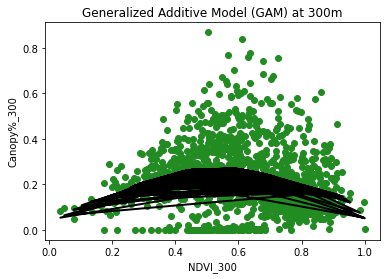

In [55]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Canopy%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 2.3. How does NDVI predict Grass%?

#### 2.3.1. Linear Regression Model

In [56]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Grass%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Grass%_300'])

# define X and y
X = df
y = target['Grass%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [57]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [0.43498223]
Intercept: -0.052730262539813055
R-squared: 0.2355554894443569


In [58]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [59]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0915891819298669
Mean Squared Error: 0.016212407568546677
Root Mean Squared Error: 0.12732795281691556


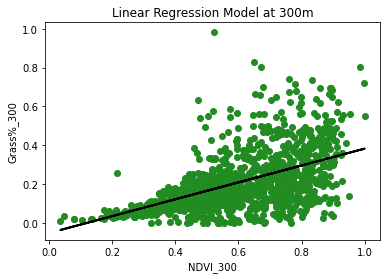

In [60]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Grass%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_grass_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.3.2. Generalized Additive Model (GAM)

In [61]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Grass%_300
target_300 = pd.DataFrame(gdf_300, columns=['Grass%_300'])

# define X and Y
X = df_300
y = target_300['Grass%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.3555
Link Function:                     IdentityLink Log Likelihood:                               -114174.5202
Number of Samples:                         4688 AIC:                                           228381.7513
                                                AICc:                                          228381.8729
                                                GCV:                                                0.0183
                                                Scale:                                              0.0182
                                                Pseudo R-Squared:                                   0.2486
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/2613320662.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [62]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

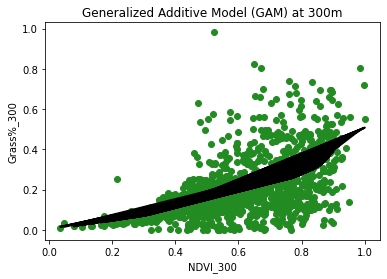

In [63]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Grass%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_grass_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 2.4. How does NDVI predict Shrubs%?

#### 2.4.1. Linear Regression Model

In [101]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Shrubs%_300
target_300 = pd.DataFrame(gdf_300, columns=['Shrubs%_300'])

# define X and y
X = df_300
y = target_300['Shrubs%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [102]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [0.56388071]
Intercept: -0.007672786497563533
R-squared: 0.16841788198096963


In [103]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [104]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1546318969692588
Mean Squared Error: 0.0467939128940856
Root Mean Squared Error: 0.21631900724181774


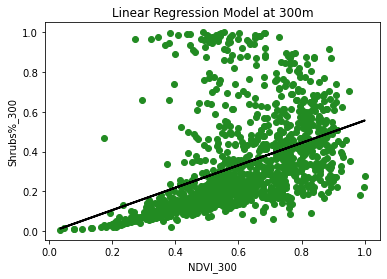

In [105]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Shrubs%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_shrubs_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.4.2. Generalized Additive Model (GAM)

In [106]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Shrubs%_300
target_300 = pd.DataFrame(gdf_300, columns=['Shrubs%_300'])

# define X and y
X = df_300
y = target_300['Shrubs%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.3555
Link Function:                     IdentityLink Log Likelihood:                                -40059.5128
Number of Samples:                         4688 AIC:                                            80151.7365
                                                AICc:                                           80151.8581
                                                GCV:                                                0.0469
                                                Scale:                                              0.0466
                                                Pseudo R-Squared:                                   0.1795
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/1184836041.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [107]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

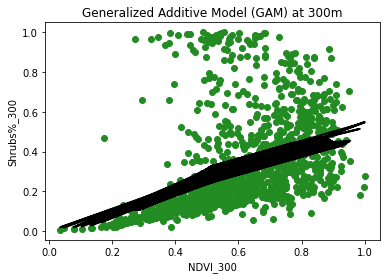

In [108]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Shrubs%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_shrubs_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 2.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [84]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
df = pd.DataFrame(gdf_300, columns=cols)

# target as NDVI_300
target = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# define X and Y
X = df
y = target['NDVI_300']
#X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model
gam_300 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)
#gam_300 = LinearGAM(n_splines=10).gridsearch(X, y)
#gam_300 = LinearGAM(s(0) + s(1) + s(2))
#gam_300.gridsearch(X, y)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      43.844
Link Function:                     IdentityLink Log Likelihood:                               -204271.4474
Number of Samples:                         4688 AIC:                                           408632.5827
                                                AICc:                                          408633.4684
                                                GCV:                                                0.0107
                                                Scale:                                              0.0105
                                                Pseudo R-Squared:                                   0.6534
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/3200285638.py:23: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


<Figure size 432x288 with 0 Axes>

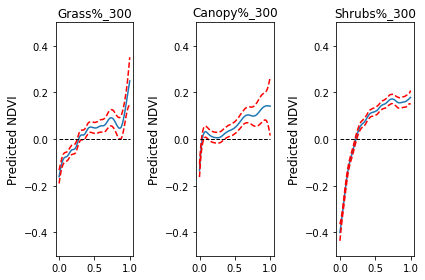

In [87]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
for i, ax in enumerate(axs):
    XX = gam_300.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_300.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_300.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 3. Modelling greenspace metrics at 500m

In [81]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_500_df.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,Grass%_500,Shrubs%_500,geometry
0,0.705614,0.883310,0.223834,0.096864,0.394812,POINT (362886.156 402352.157)
1,0.617635,0.871672,0.294723,0.504887,0.241740,POINT (354204.802 403929.521)
2,0.482378,0.430316,0.417175,0.186725,0.096558,POINT (379393.300 410476.219)
3,0.612922,0.635173,0.605278,0.147921,0.167965,POINT (385552.048 388856.047)
4,0.880711,0.992519,0.096232,0.329978,0.685176,POINT (367806.732 411583.484)


### 3.1. How does NDVI predict Greenspace%?

#### 3.1.1. Linear Regression Model

In [65]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [66]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [1.07648054]
Intercept: 0.022356688059548935
R-squared: 0.6880493425932274


In [67]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [68]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08739290113836838
Mean Squared Error: 0.01715198949087206
Root Mean Squared Error: 0.1309656042282555


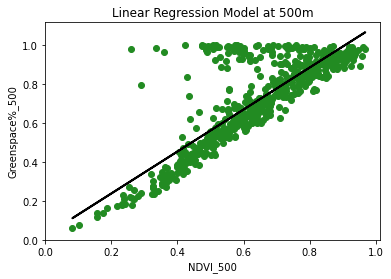

In [69]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [70]:
# Change in NDVI values: how does Greenspace% increase, if NDVI changes from 0.3 to 0.4?
green0 = model_500.predict([[0.3]])
green1 = model_500.predict([[0.4]])
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', green1 - green0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.10764805]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 3.1.2. Generalized Additive Model (GAM)

In [71]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Greenspace%_500
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and Y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5125
Link Function:                     IdentityLink Log Likelihood:                                -72868.8151
Number of Samples:                         2325 AIC:                                           145768.6551
                                                AICc:                                           145768.877
                                                GCV:                                                0.0145
                                                Scale:                                              0.0143
                                                Pseudo R-Squared:                                   0.7151
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/2741797941.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [72]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

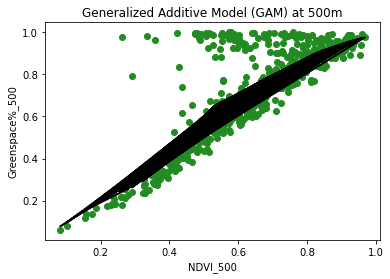

In [73]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [74]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_500.predict(0.25)
green_l1 = gam_500.predict(0.35)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by:', green_l1 - green_l0)

If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by: [0.08863647]


In [75]:
# Change in medium NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_500.predict(0.45)
green_m1 = gam_500.predict(0.55)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by:', green_m1 - green_m0)

If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by: [0.18807665]


In [76]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_500.predict(0.65)
green_h1 = gam_500.predict(0.75)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by:', green_h1 - green_h0)

If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by: [0.08037928]


### 3.2. How does NDVI predict Canopy%?

#### 3.2.1. Linear Regression Model

In [77]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [78]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [-0.09849543]
Intercept: 0.32325547937498655
R-squared: 0.011636128118764355


In [79]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [80]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12011960999568033
Mean Squared Error: 0.0241886203562305
Root Mean Squared Error: 0.15552691199991886


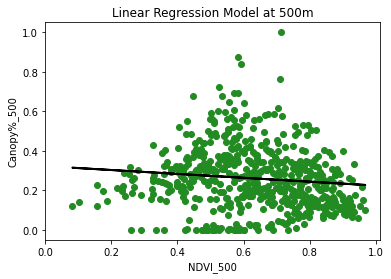

In [81]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Canopy%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.2.2. Generalized Additive Model (GAM)

In [82]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Canopy%_500
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and Y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5125
Link Function:                     IdentityLink Log Likelihood:                                -42587.9854
Number of Samples:                         2325 AIC:                                            85206.9957
                                                AICc:                                           85207.2176
                                                GCV:                                                0.0238
                                                Scale:                                              0.0235
                                                Pseudo R-Squared:                                   0.0565
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/1293848242.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [83]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

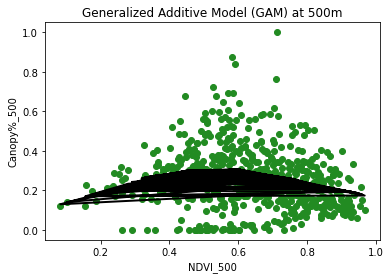

In [84]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Canopy%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 3.3. How does NDVI predict Grass%?

#### 3.3.1. Linear Regression Model

In [85]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Grass%_500 as the target
target = pd.DataFrame(gdf_500, columns=['Grass%_500'])

# define X and y
X = df
y = target['Grass%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [86]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [0.45673844]
Intercept: -0.047191395583967316
R-squared: 0.2969569959161814


In [87]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [88]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08474701377696026
Mean Squared Error: 0.01406318076842141
Root Mean Squared Error: 0.11858828259327062


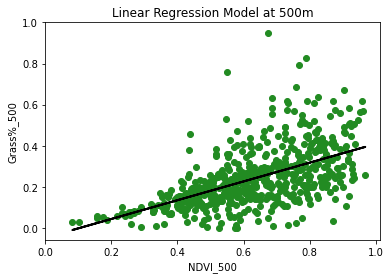

In [89]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Grass%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_grass_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.3.2. Generalized Additive Model (GAM)

In [90]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Grass%_500
target = pd.DataFrame(gdf_500, columns=['Grass%_500'])

# define X and Y
X = df
y = target['Grass%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5125
Link Function:                     IdentityLink Log Likelihood:                                -71260.1163
Number of Samples:                         2325 AIC:                                           142551.2575
                                                AICc:                                          142551.4795
                                                GCV:                                                0.0148
                                                Scale:                                              0.0146
                                                Pseudo R-Squared:                                   0.3026
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/4189625168.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [91]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

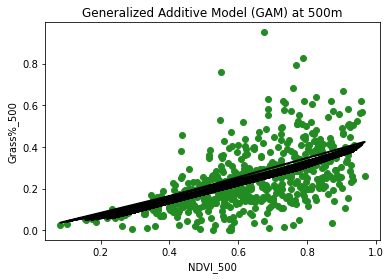

In [92]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Grass%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_grass_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 3.4. How does NDVI predict Shrubs%?

#### 3.4.1. Linear Regression Model

In [109]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Shrubs%_500 as the target
target = pd.DataFrame(gdf_500, columns=['Shrubs%_500'])

# define X and y
X = df
y = target['Shrubs%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [110]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [0.55192994]
Intercept: -0.01895652192903391
R-squared: 0.18863045187781124


In [111]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [112]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14067685530427945
Mean Squared Error: 0.041838321807468375
Root Mean Squared Error: 0.20454418057590487


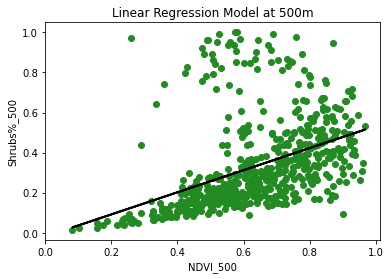

In [113]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Shrubs%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_shrubs_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.4.2. Generalized Additive Model (GAM)

In [114]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Shrubs%_500
target = pd.DataFrame(gdf_500, columns=['Shrubs%_500'])

# define X and Y
X = df
y = target['Shrubs%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5125
Link Function:                     IdentityLink Log Likelihood:                                -24793.1515
Number of Samples:                         2325 AIC:                                            49617.3278
                                                AICc:                                           49617.5498
                                                GCV:                                                0.0386
                                                Scale:                                              0.0382
                                                Pseudo R-Squared:                                   0.2082
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2333/1732242172.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [115]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

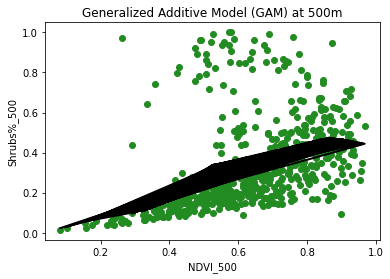

In [116]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Shrubs%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_shrubs_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 3.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [82]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
df = pd.DataFrame(gdf_500, columns=cols)

# target as NDVI_500
target = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# define X and Y
X = df
y = target['NDVI_500']
#X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model
gam_500 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)
#gam_500 = LinearGAM(n_splines=10).gridsearch(X, y)
#gam_500 = LinearGAM(s(0) + s(1) + s(2))
#gam_500.gridsearch(X, y)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      39.986
Link Function:                     IdentityLink Log Likelihood:                               -125772.0245
Number of Samples:                         2325 AIC:                                           251626.0211
                                                AICc:                                          251627.5286
                                                GCV:                                                0.0088
                                                Scale:                                              0.0085
                                                Pseudo R-Squared:                                   0.7192
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3269/109390558.py:23: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


<Figure size 432x288 with 0 Axes>

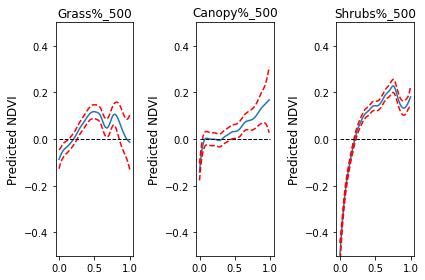

In [88]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
for i, ax in enumerate(axs):
    XX = gam_500.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_500.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_500.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 4. Prediction sensitivity to changes in low, mid, and high NDVI values

### 4.1. At 100m

In [184]:
# data of lists
data_100 = {'Changes in NDVI': ['Low-range (0.25 to 0.35)', 'Mid-range (0.45 to 0.55)', 'High-range (0.65 to 0.75)'], 
        'Greenspace%_100': [green_sens_low, green_sens_mid, green_sens_hig],
        'Grass%_100': [grass_sens_low, grass_sens_mid, grass_sens_hig],
        'Canopy%_100': [canopy_sens_low, canopy_sens_mid, canopy_sens_hig], 
        'Shrubs%_100': [shrubs_sens_low, shrubs_sens_mid, shrubs_sens_hig]}  
  
# create DataFrame  
df_sens_100 = pd.DataFrame(data_100)
df_sens_100 = df_sens_100.round(4)
df_sens_100.head()

,Changes in NDVI,Greenspace%_100,Grass%_100,Canopy%_100,Shrubs%_100
0,Low-range (0.25 to 0.35),0.1056,0.0224,0.0593,0.0360
1,Mid-range (0.45 to 0.55),0.1984,0.0384,0.0720,0.1012
2,High-range (0.65 to 0.75),0.1163,0.0238,-0.0516,0.0832


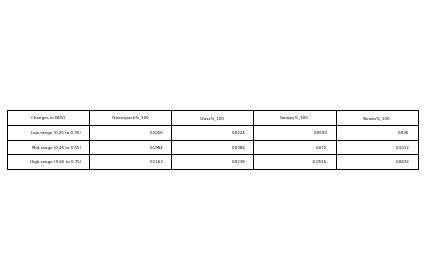

In [185]:
# plotting
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

ax.table(cellText=df_sens_100.values, colLabels=df_sens_100.columns, loc='center')

fig.tight_layout()

# save the figure
plt.savefig('thesis_project/visualizations/modelling/sensitivity_100_table.png', dpi=300, bbox_inches='tight')

plt.show()

### 4.2. At 300m

In [ ]:
# data of lists
data_100 = {'Changes in NDVI': ['Low-range (0.25 to 0.35)', 'Mid-range (0.45 to 0.55)', 'High-range (0.65 to 0.75)'], 
        'Greenspace%_100': [green_sens_low, green_sens_mid, green_sens_hig],
        'Grass%_100': [grass_sens_low, grass_sens_mid, grass_sens_hig],
        'Canopy%_100': [canopy_sens_low, canopy_sens_mid, canopy_sens_hig], 
        'Shrubs%_100': [shrubs_sens_low, shrubs_sens_mid, shrubs_sens_hig]}  
  
# create DataFrame  
df_sens_100 = pd.DataFrame(data_100)
df_sens_100 = df_sens_100.round(4)
df_sens_100.head()

### 4.3. At 500m